In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = 'https://www.airbnb.com/s/Zanzibar--Tanzania/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=1&query=Zanzibar%2C%20Tanzania&place_id=ChIJQT0dOfPQXBgR1UpezDMDwts&date_picker_type=calendar&checkin=2022-12-16&checkout=2022-12-17&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=18d66315-8f79-47fc-954b-3040f9d18698&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D'

In [3]:
response = requests.get(url)

In [4]:
print(response)

<Response [200]>


In [5]:
soup = BeautifulSoup(response.content, 'html.parser')

In [8]:
all = soup.find('div', class_='gh7uyir')

In [9]:
hotels = all.find_all('div',class_='c4mnd7m')

In [ ]:
zanzibar = []
base_url ='https://www.airbnb.com/s/Zanzibar--Tanzania/homes?tab_id=home_tab&refinement_paths%5B%5D=%2Fhomes&flexible_trip_lengths%5B%5D=one_week&price_filter_input_type=0&price_filter_num_nights=1&query=Zanzibar%2C%20Tanzania&place_id=ChIJQT0dOfPQXBgR1UpezDMDwts&date_picker_type=calendar&checkin=2022-12-16&checkout=2022-12-17&source=structured_search_input_header&search_type=autocomplete_click&federated_search_session_id=18d66315-8f79-47fc-954b-3040f9d18698&pagination_search=true&cursor=eyJzZWN0aW9uX29mZnNldCI6MCwiaXRlbXNfb2Zmc2V0IjowLCJ2ZXJzaW9uIjoxfQ%3D%3D'
url = base_url + '/page1'
scraping = True

while scraping:
  response = requests.get(url)

  soup = BeautifulSoup(response.content, 'html.parser')

  all = soup.find('div', class_='gh7uyir')
  hotels = all.find_all('div',class_='c4mnd7m')
  for items in hotels:
    title = items.find('div',class_='t1jojoys').text
    location = items.find('span',class_='t6mzqp7').text
    price = items.find('span',class_='a8jt5op').text[0:4]
    zanzibar.append([title,location,price])
    
    next_page_link = soup.find('a', class_='_833p2h')
    if next_page_link:
      url = base_url + next_page_link['href']
    else:
      scraping = False

 
  

 
  
  

In [112]:
import pandas as pd

In [183]:
df= pd.DataFrame(zanzibar, columns = ['Name','Location','Price'])

In [184]:
df.to_csv('zanzibar.csv')

In [185]:
data = pd.read_csv(r'/content/zanzibar.csv')

In [186]:
data

,Unnamed: 0,Name,Location,Price
0,0,Private room in Zanzibar,Private room shangani sea view,$25
1,1,Private room in Zanzibar,Kingstone lodge (Garden view),$50
2,2,Villa in Bwejuu,Coco Rise Villas I - by Hostly,$300
3,3,Private room in Zanzibar,"welcome to Zanzi house, stone town Zanzibar",$55
4,4,Villa in Zanzibar,"New Modern Villa, Close To Beach, Shops & Bars",$165
...,...,...,...,...
1095,1095,Apartment in Urban west,Gents Code - At The Train's House Stone Town,$60
1096,1096,Private room in Bwejuu,Small Size Beach Bungalows at Evergreen Bungalows,$50
1097,1097,Home in Bwejuu,Kamanda House - Private Guest House near the B...,$61
1098,1098,Condo in Zanzibar,Welcome to kitauni apartment,$26


In [ ]:
data['Price'] = data['Price'].str.replace('$','')

In [193]:
data.rename(columns = {'Price':'Price_in_usd'},inplace = True)

In [194]:
data


,Unnamed: 0,Name,Location,Price_in_usd
0,0,Private room in Zanzibar,Private room shangani sea view,25
1,1,Private room in Zanzibar,Kingstone lodge (Garden view),50
2,2,Villa in Bwejuu,Coco Rise Villas I - by Hostly,300
3,3,Private room in Zanzibar,"welcome to Zanzi house, stone town Zanzibar",55
4,4,Villa in Zanzibar,"New Modern Villa, Close To Beach, Shops & Bars",165
...,...,...,...,...
1095,1095,Apartment in Urban west,Gents Code - At The Train's House Stone Town,60
1096,1096,Private room in Bwejuu,Small Size Beach Bungalows at Evergreen Bungalows,50
1097,1097,Home in Bwejuu,Kamanda House - Private Guest House near the B...,61
1098,1098,Condo in Zanzibar,Welcome to kitauni apartment,26


In [196]:
data.dtypes

Unnamed: 0       int64
Name            object
Location        object
Price_in_usd    object
dtype: object

In [197]:
data['Price_in_usd']= data['Price_in_usd'].astype(int)

In [199]:
data.dtypes

Unnamed: 0       int64
Name            object
Location        object
Price_in_usd     int64
dtype: object

In [209]:
data.groupby('Location').Price_in_usd.mean().sort_values(ascending = False).round().head(10)

Location
V   I   L   L   A          O   A   S   I   S          329.0
Coco Rise Villas I - by Hostly                        300.0
FungaFungaBeachVilla 1                                180.0
New Modern Villa, Close To Beach, Shops & Bars        165.0
Beach Hut  at The Adventure Villa                     120.0
Maru Maru Hotel, Zanzibar                             112.0
Beautiful beach villa room inc Wi-Fi (adults only)     96.0
House of Royals - Sultan Barghash Suite                92.0
Imara Boutique Hotel                                   87.0
Promised Land Lodge: Deluxe Double                     80.0
Name: Price_in_usd, dtype: float64

In [210]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Average Price')

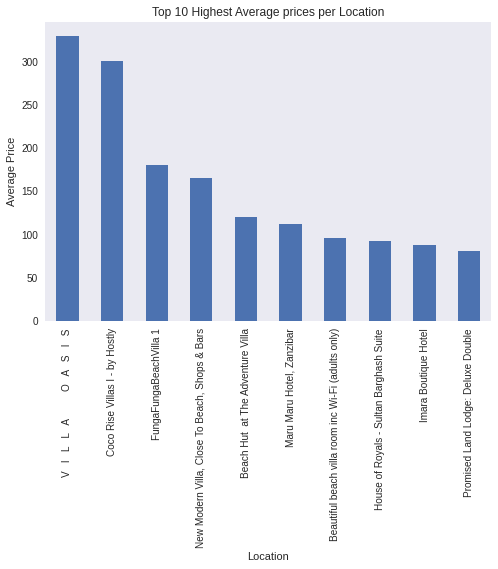

In [221]:
plt.style.use('seaborn-dark')
data.groupby('Location').Price_in_usd.mean().sort_values(ascending = False).round().head(10).plot(kind = 'bar')
plt.title('Top 10 Highest Average prices per Location')
plt.ylabel('Average Price')
